In [265]:
import pandas as pd 
import numpy as np
import pickle
import sklearn

In [266]:
import matplotlib.pyplot as plt
import cv2

In [267]:
#load all models

In [268]:
haar=cv2.CascadeClassifier('D://BISM/mlops/2_Train_FaceRecognition_with_ML/model/haarcascade_frontalface_default.xml')

In [269]:
#loading machine learning model
svm_model=pickle.load(open('D://BISM/mlops/cropped_images_data/model_svm.pickle' ,mode='rb'))

In [270]:
#loading the PCA model
pca_model=pickle.load(open('D://BISM/mlops/cropped_images_data/pca_dict.pickle' , mode='rb'))

In [271]:
model_pca=pca_model['pca']
mean_face=pca_model['mean_face']

In [272]:
model_pca

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

creating the pipeline

In [273]:
#step 1:reading the image

In [274]:
image=cv2.imread('D://test_8.png')

In [275]:
type(image)

numpy.ndarray

In [276]:
# Display the image
cv2.imshow('Image', image)

# Wait for a key press to close the window
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

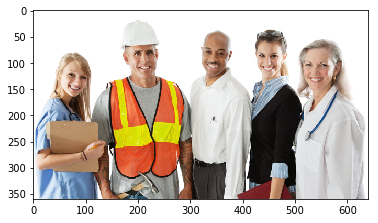

In [277]:
img_rgb=cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb,cmap='gray')
plt.show()

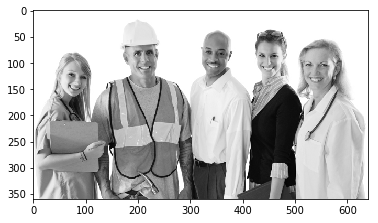

In [278]:
#step_2 converting the image to grayscale

img_gray=cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.show()


In [279]:
# step 3 cropping the image using haar cascade classifier

In [280]:
faces=haar.detectMultiScale(img_gray , 1.5 , 3)

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression


In [282]:
predictions=[]

for x,y,w,h in faces:
    #cv2.rectangle(img_rgb , (x,y) , (x+w,y+h)  , (255,0,0) , 3 )
    roi=img_gray[y:y+h , x:x+w]
    #ste4 normalize the image
    roi=roi/255
    #step5 resizing the image:
    if roi.shape[1]>100:
        roi_resize=cv2.resize(roi , (100,100),cv2.INTER_AREA)
    else:
        roi_resize=cv2.resize(roi , (100,100),cv2.INTER_CUBIC)
    #step6 flatteining the image
    roi_reshape=roi_resize.reshape(1,10000)
    #step7 suptracting the mean of faces:
    roi_mean=roi_reshape-mean_face
    #step 8 get the eigen information: 
    eigen_image=model_pca.transform(roi_mean)
    #step9 : eigen image for visualization:
    eig_image=model_pca.inverse_transform(eigen_image)
    #step 10: pass to the model and get the predictaion:
    result=svm_model.predict(eigen_image)
    confidence_scores = svm_model.decision_function(eigen_image)
    #step 11: 
    print(result[0],confidence_scores)
    text="%s"%(result[0])
    #defining the colour based on the gender:
    if result[0]=='male':
        cv2.rectangle(img_rgb , (x,y)  , (x+w , y+h) ,(255,255,0),2   )
        cv2.rectangle(img_rgb , (x,y-30) , (x+w , y) , (255,255,0),-1)
        cv2.putText(img_rgb , result[0] , (x , y),cv2.FONT_HERSHEY_PLAIN,2,(255,255,255) , 2)
    if result[0]=='female':
        cv2.rectangle(img_rgb , (x,y)  , (x+w , y+h) ,(255,0,255),2  )
        cv2.rectangle(img_rgb , (x,y-30) , (x+w , y) , (255,0,255),-1)

        cv2.putText(img_rgb , result[0] , (x , y),cv2.FONT_HERSHEY_PLAIN,2,(255,255,255) , 2)
    output_dict={

        'roi':roi,
        'eig_image':eig_image,
        'prediction_name':result[0]
    }
    predictions.append(output_dict)
    
    

    




male [0.02298622]
female [-0.46636545]
female [-0.41038388]


In [283]:
# Display the image
cv2.imshow('Image', cv2.cvtColor(img_rgb,cv2.COLOR_RGB2BGR))

# Wait for a key press to close the window
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

In [284]:
output_dict.keys()

dict_keys(['roi', 'eig_image', 'prediction_name'])

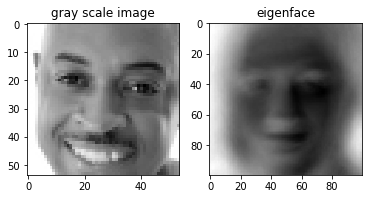

predicted gender male
****************************************************************************************************


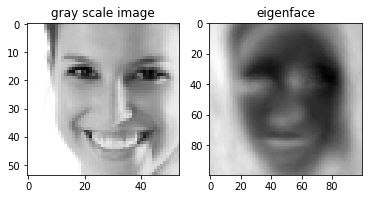

predicted gender female
****************************************************************************************************


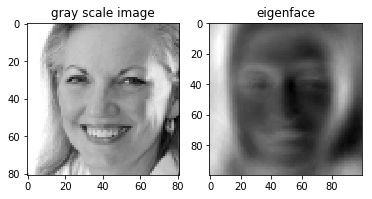

predicted gender female
****************************************************************************************************


In [285]:
for i in range(len(predictions)):
    obj_image_gray=predictions[i]['roi']
    obj_image_eig=predictions[i]['eig_image'].reshape(100,100)
    plt.subplot(1,2,1)
    plt.imshow(obj_image_gray , cmap='gray')
    plt.title("gray scale image")
    plt.subplot(1,2,2)
    plt.imshow(obj_image_eig , cmap='gray')
    plt.title("eigenface")
    plt.show()
    print("predicted gender" , predictions[i]['prediction_name'])
    print("*"*100)
